# Computational Drug Discovery Pipeline
#### By Mathew Kuruvilla

## Setting Directory

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Data Preprocessing

In [3]:
from src.data_preprocessing import load_data, clean_data, compute_descriptors

df = load_data('../data/example_dataset.csv')
df_clean = clean_data(df)
df_final = compute_descriptors(df_clean)

print(df.shape)
print(df_clean.shape)
print(df_final.shape)

(3660, 46)
(2401, 46)
(2401, 50)


## EDA

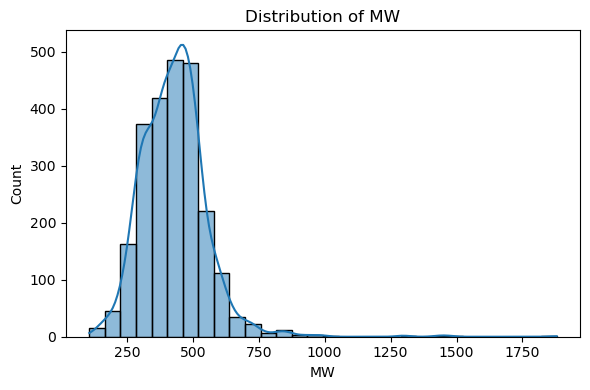

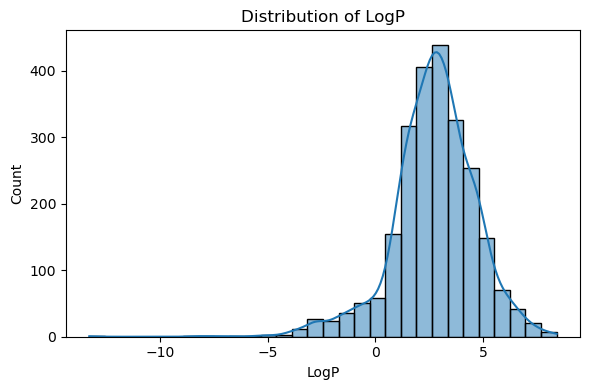

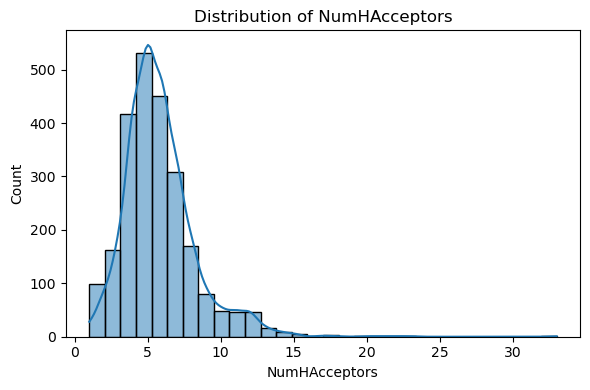

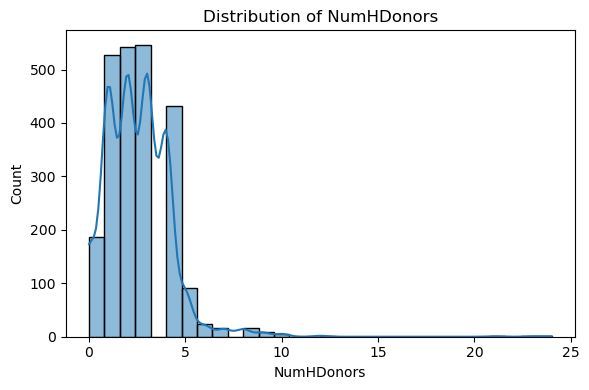

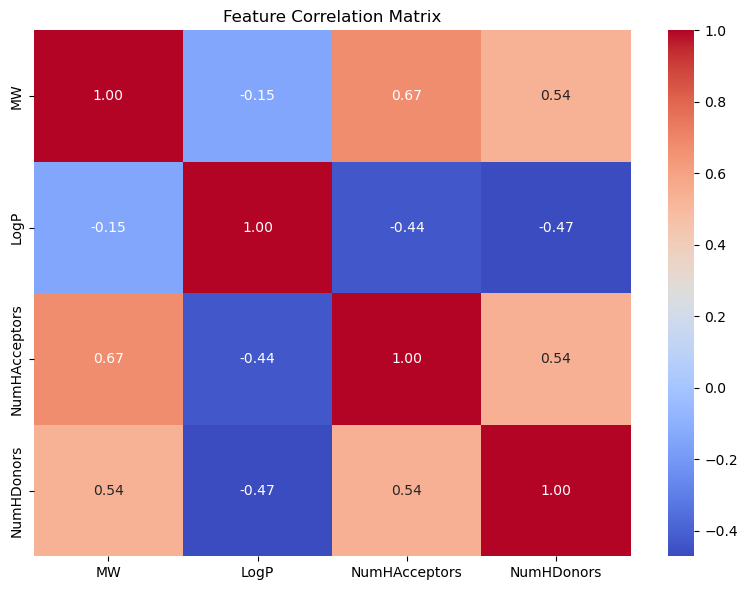

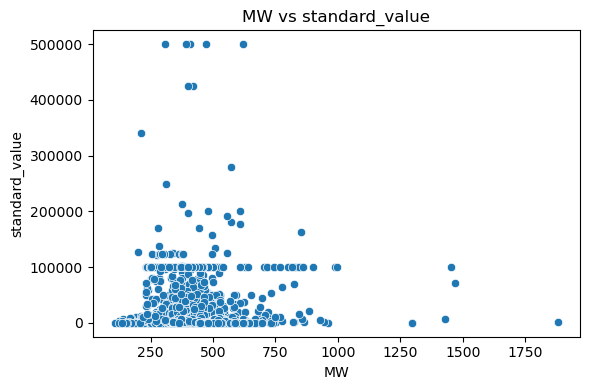

In [4]:
from src.eda import plot_feature_histograms, plot_correlation_matrix, plot_feature_vs_target

# Example usage:
features = ['MW', 'LogP', 'NumHAcceptors', 'NumHDonors']

plot_feature_histograms(df_final, features)
plot_correlation_matrix(df_final, features)
plot_feature_vs_target(df_final, 'MW', 'standard_value')

## Dataset Preparation

In [7]:
from src.dataset_preparation import prepare_features_and_target, split_train_test

features = ['MW', 'LogP', 'NumHAcceptors', 'NumHDonors']

X, y = prepare_features_and_target(df_final, features)
X_train, X_test, y_train, y_test = split_train_test(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1920, 4)
(481, 4)
(1920,)
(481,)


## Model Training

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250, 'random_state': 1}
R²: 0.4616
Mean Absolute Error (MAE): 0.7212
Mean Squared Error (MSE): 0.8796
Root Mean Squared Error (RMSE): 0.9379


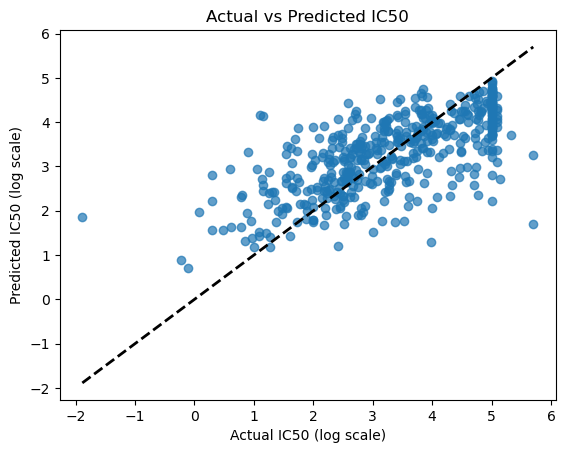

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'random_state': [1]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R²: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.7)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

ax.set_xlabel('Actual IC50 (log scale)')
ax.set_ylabel('Predicted IC50 (log scale)')
ax.set_title('Actual vs Predicted IC50')

plt.show()

## Model Evaluation

Model Evaluation Metrics: {'R2 Score': 0.46155092302303646, 'Mean Absolute Error': 0.7211676207052912, 'Mean Squared Error': 0.8795776855577996}


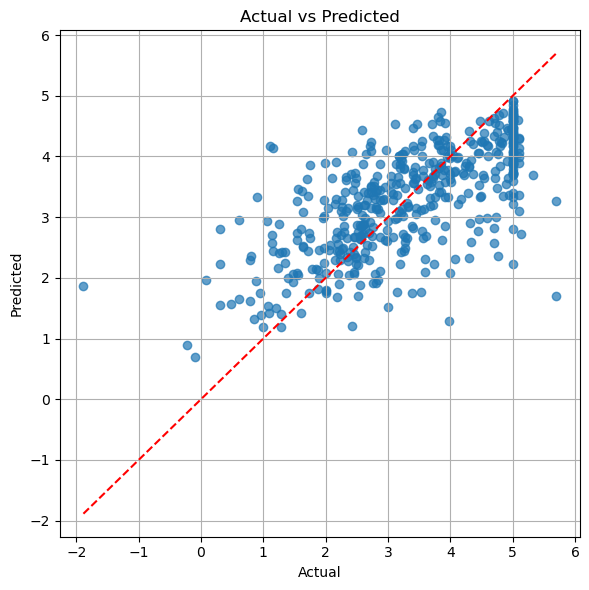

In [17]:
from src.model_evaluation import evaluate_model, plot_actual_vs_predicted

best_model = grid_search.best_estimator_
metrics = evaluate_model(best_model, X_test, y_test)
print("Model Evaluation Metrics:", metrics)

y_pred = best_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred)